In [75]:
%load_ext autoreload
%autoreload 2

import cv2

from src.seq import SeqGeneralHoughTransform

IMAGE_DIR = './images'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


----------Start processing template----------

----------End processing template----------

Time processing template: 0.10020232200622559

----------Start accumulating src----------



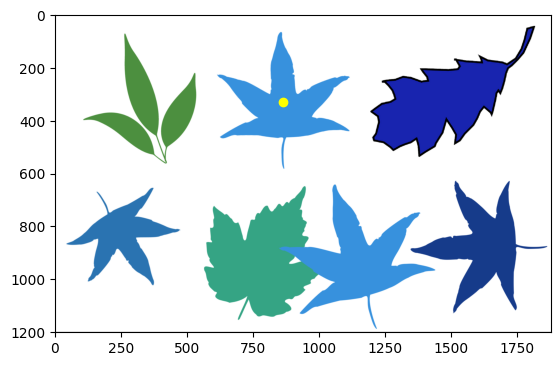

----------End accumulating src----------

Time process: 36.097705125808716s



In [78]:
template = cv2.imread("./images/leaf.png")
src = cv2.imread("./images/leaves.png")
ght = SeqGeneralHoughTransform(src, template)
ght.process_template()
ght.accumulate_src(image_dir=IMAGE_DIR)